In [1]:
import torch
import matplotlib.pyplot as plt

device = torch.device('cuda:0')
steps  = 201
m    = 1
p    = torch.tensor(.8)
sig  = 1/2
k    = 3
d    = 1000000
bs   = 10
h    = torch.log(p/(1-p))/2
x    = torch.randn(d, bs, device=device) * d**(1/2)
xs   = [x]

tau  = lambda t: (1-k/d**(1/2))*2*t if t < 1/2 else (1-k/d**(1/2)) + k/d**(1/2) * (2*t-1)
taup = lambda t: (1-k/d**(1/2))*2 if t < 1/2 else k/d**(1/2) * 2
ones = torch.ones(d, device=device)

den  = lambda t: d * (1-tau(t))**2 + sig**2 * tau(t)**2
bf   = lambda x, t: ((d+sig**2)*taup(t)*tau(t) - d * taup(t))/den(t) * x + d*taup(t)*(1-tau(t))/den(t) * m * torch.outer(ones, torch.tanh(m*h + tau(t) * m * ones @ x / den(t)))

ts   = torch.linspace(0, 1, steps)

for i, t in enumerate(ts[:-1]):
    if i % 10 == 0: print(t)
    dt = ts[i+1] - ts[i]
    x = x + bf(x, t) * dt
    xs.append(x)

xs = torch.stack(xs)

tensor(0.)
tensor(0.0500)
tensor(0.1000)
tensor(0.1500)
tensor(0.2000)
tensor(0.2500)
tensor(0.3000)
tensor(0.3500)
tensor(0.4000)
tensor(0.4500)
tensor(0.5000)
tensor(0.5500)
tensor(0.6000)
tensor(0.6500)
tensor(0.7000)
tensor(0.7500)
tensor(0.8000)
tensor(0.8500)
tensor(0.9000)
tensor(0.9500)


In [2]:
ms = xs.mean(1).cpu().numpy()

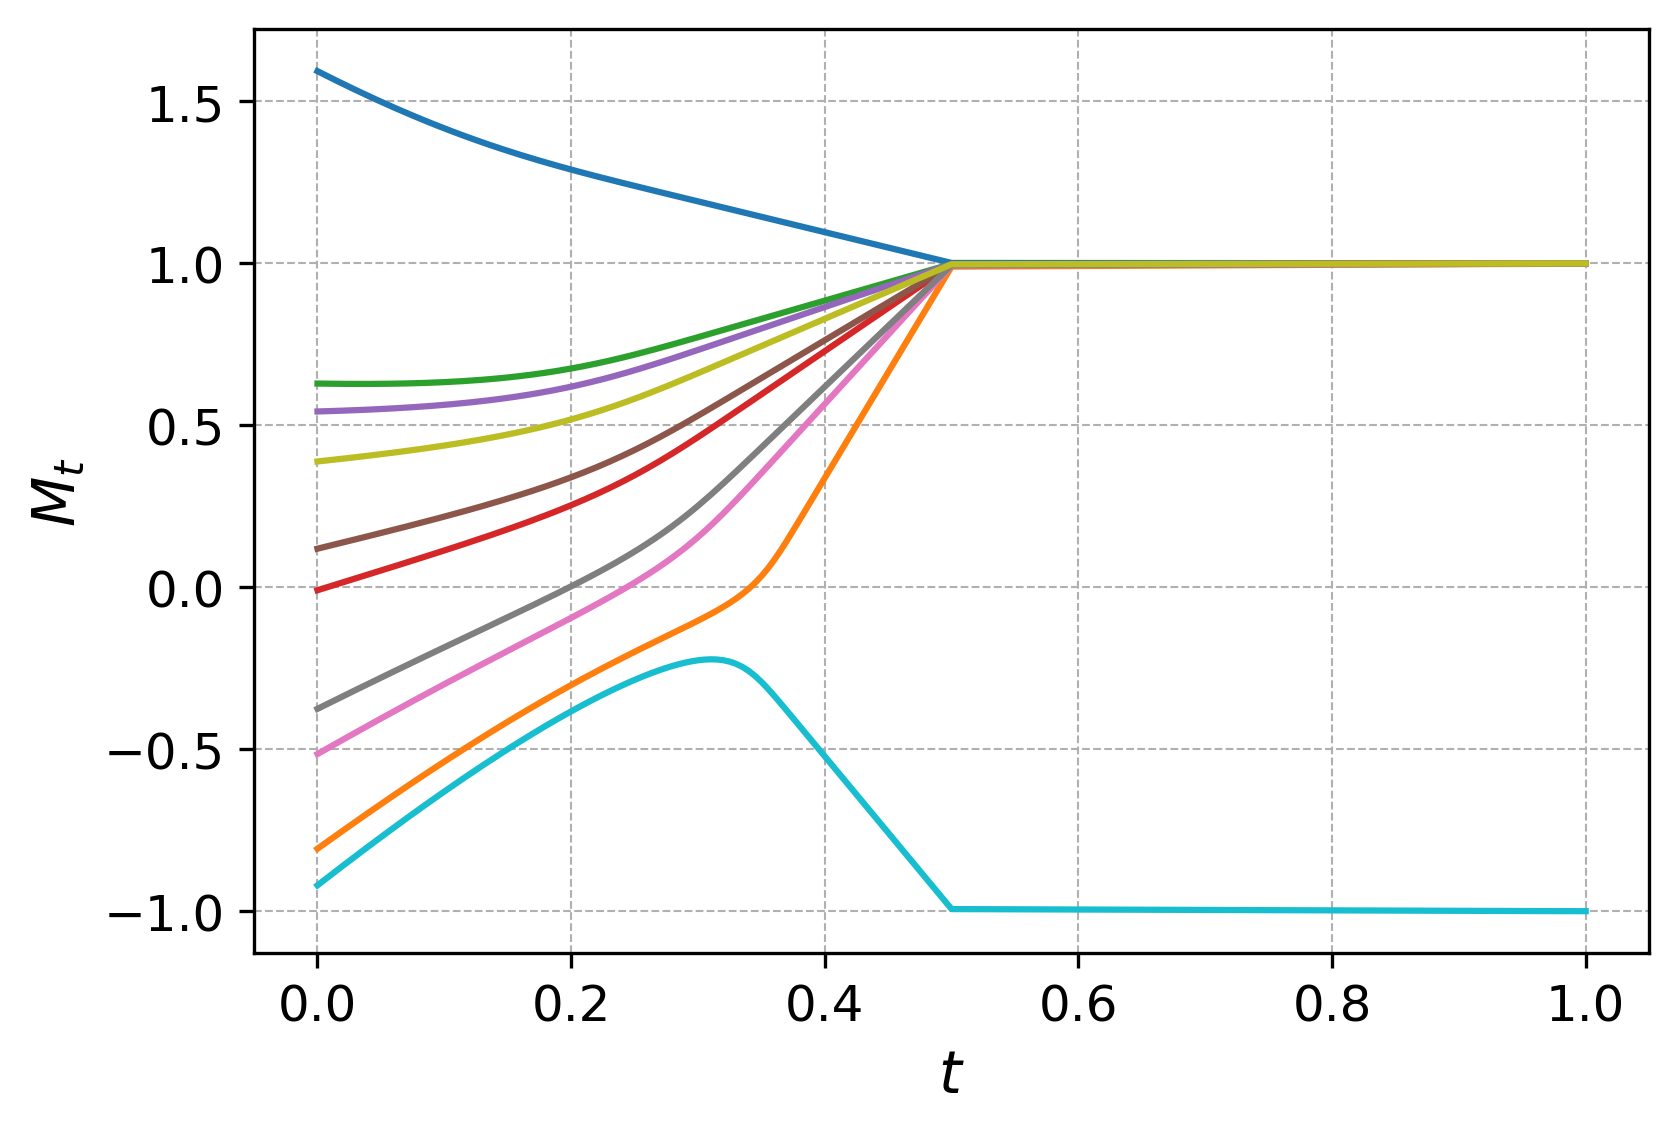

In [3]:
plt.figure(figsize=(6, 4), dpi=300)
plt.plot(ts, ms)

plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$M_t$', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('a.png', bbox_inches='tight')

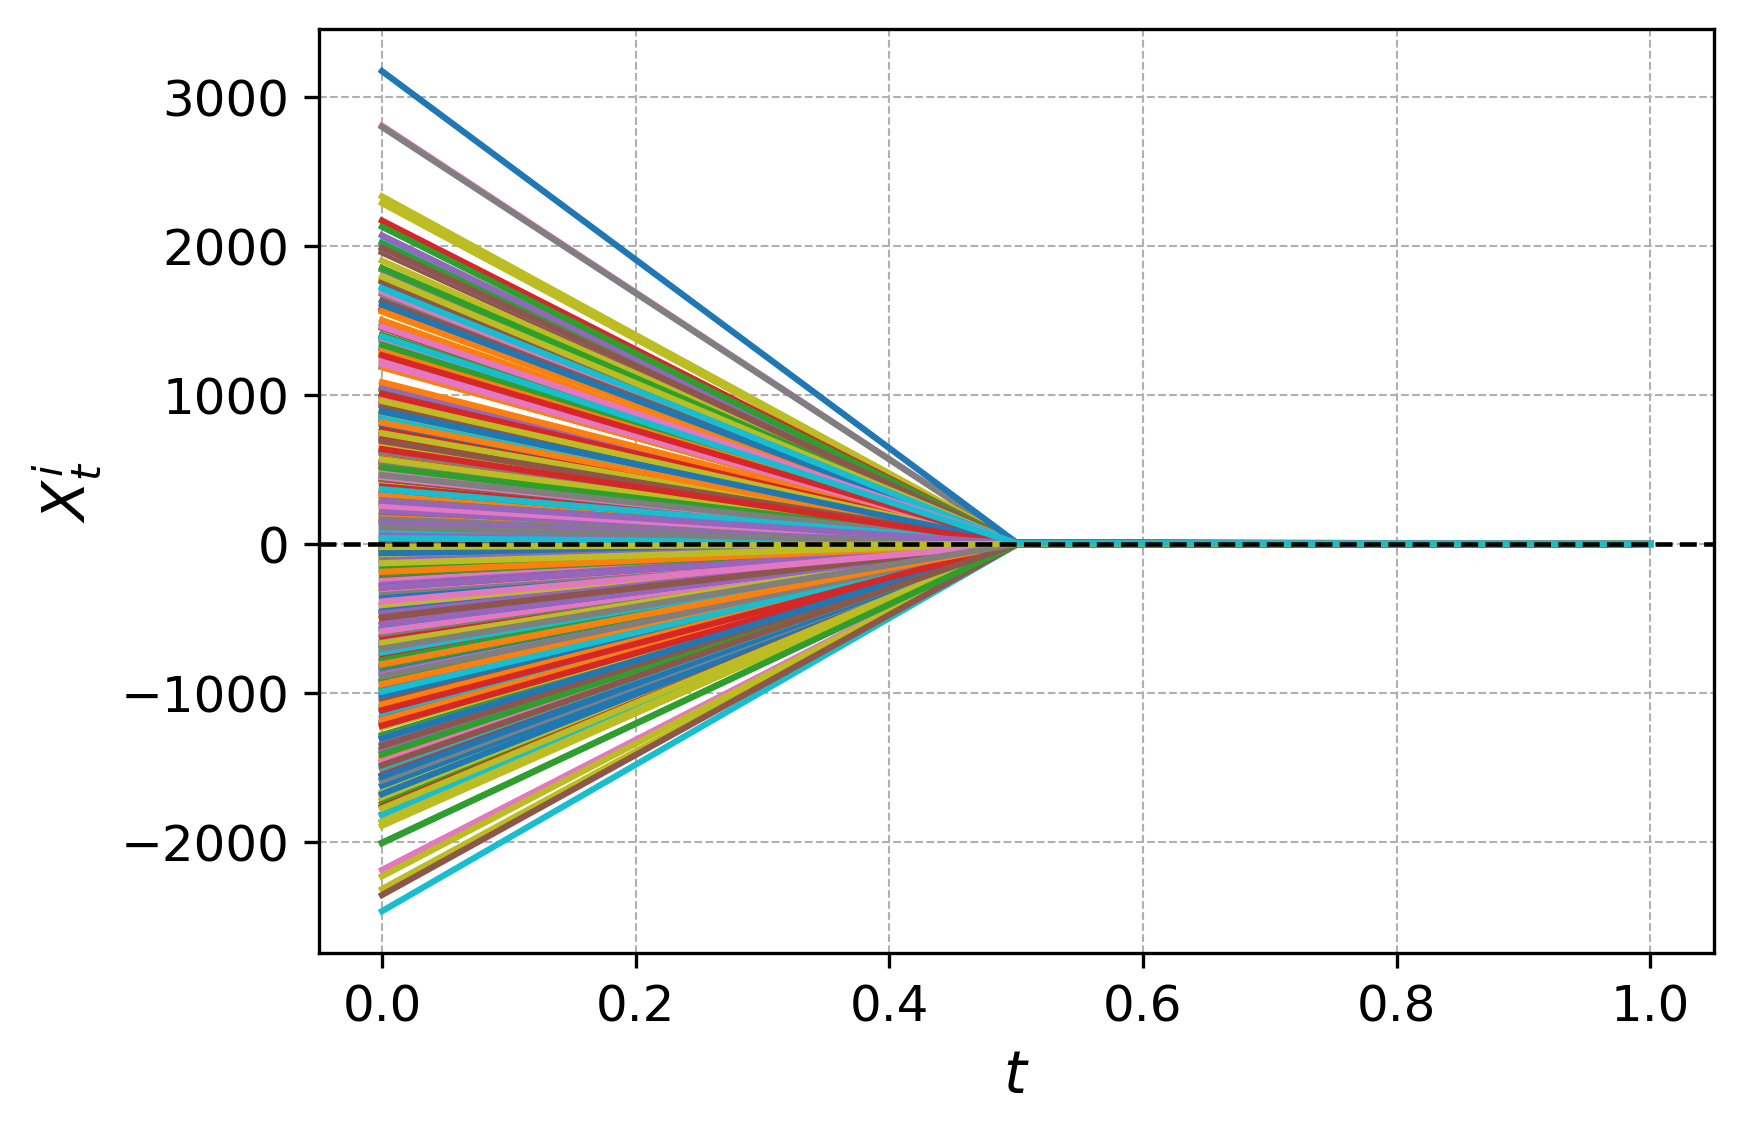

In [7]:
plt.figure(figsize=(6, 4), dpi=300)
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$X_t^i$', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(ts, xs[:, 0:500, 0].cpu().numpy());

plt.axhline(1, 0, 1, color='black', linestyle='--', lw=1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('b.png', bbox_inches='tight')